In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [25]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [26]:
import matplotlib.pyplot as plt 

In [28]:
# Loading the  data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [29]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0


## Defning the class 

In [30]:
class_name= ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck']

## Data VIZ

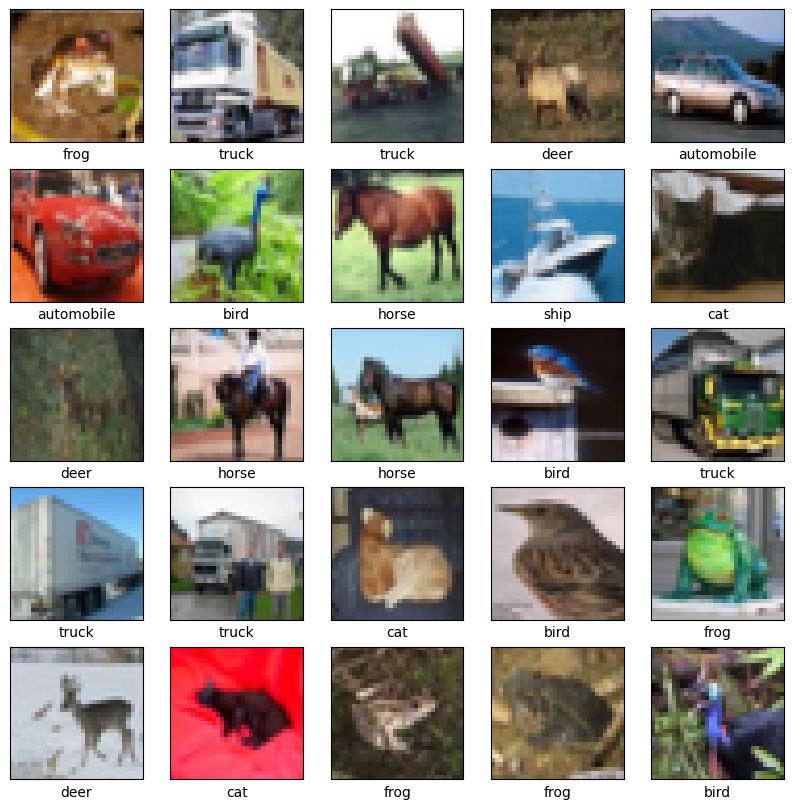

In [31]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting the images
plt.figure(figsize=(10, 10))
for i in range(25):  # 25 images in our training set
    plt.subplot(5, 5, i + 1)  # creating a subplot of 5 rows and 5 columns for each image
    plt.xticks([]) 
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i][0]])
plt.show()

In [32]:
# Building  the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



## Training the CNN model

In [36]:
history= model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 1.5211 - accuracy: 0.4457 - val_loss: 1.3329 - val_accuracy: 0.5168
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1645 - accuracy: 0.5861 - val_loss: 1.1461 - val_accuracy: 0.5960
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0315 - accuracy: 0.6362 - val_loss: 1.0181 - val_accuracy: 0.6412
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9429 - accuracy: 0.6702 - val_loss: 0.9318 - val_accuracy: 0.6716
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8651 - accuracy: 0.6963 - val_loss: 0.8848 - val_accuracy: 0.6903
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8072 - accuracy: 0.7166 - val_loss: 0.8805 - val_accuracy: 0.6974
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7599 - accuracy: 0.7320 - val_loss: 0.9015 -

## Evaluating the performance of the CNN model

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n Test accuracu is:{test_acc}')

313/313 - 1s - loss: 0.9088 - accuracy: 0.6954 - 1s/epoch - 5ms/step

 Test accuracu is:0.6953999996185303


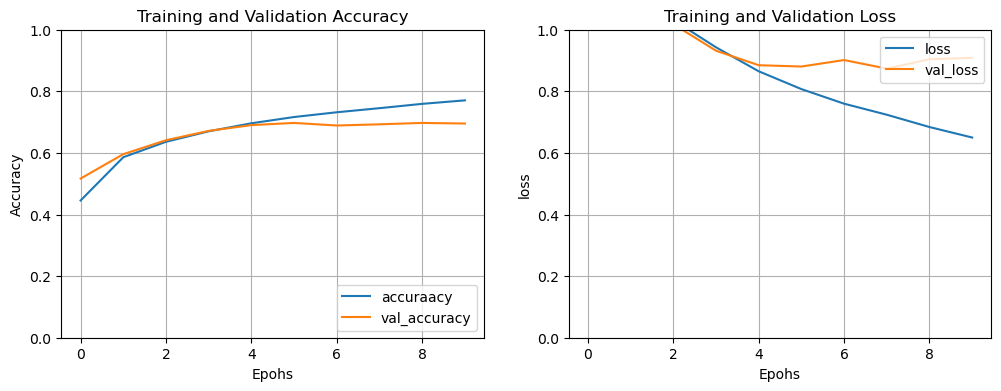

In [38]:
# Plot training & validation loss values
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuraacy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epohs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid ()         

          
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epohs')
plt.ylabel('loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()                   


plt.show()

## Hyperparameter Tuning

In [55]:
from keras_tuner.tuners import RandomSearch
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from kerastuner.engine.hyperparameters import HyperParameters

In [41]:
# Defining a function to build the model

In [48]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10))
    
    


## chosing an optimizer

In [57]:
def build_model(hp):
    model = Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10))
    
    ## choosing an optimizer

    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

    return model




In [50]:
## dfining the tuner

In [59]:
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10))

    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

    return model

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cifar10_tuning'
)


In [ ]:
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

## Getting the best Hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

## building the model with the best parameters

model=tuner.hypermodel.build(best_hps)
history=model.fit(train_images, train_labels, epochs10, validation_data=(test_images, test_labels))

## Hyperparameter search

In [66]:
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Getting the best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Building the model with the best parameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.6213 - accuracy: 0.4019 - val_loss: 1.2584 - val_accuracy: 0.5422
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2370 - accuracy: 0.5627 - val_loss: 1.1330 - val_accuracy: 0.5902
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0859 - accuracy: 0.6205 - val_loss: 1.0117 - val_accuracy: 0.6400
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9834 - accuracy: 0.6545 - val_loss: 0.9631 - val_accuracy: 0.6729
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9106 - accuracy: 0.6838 - val_loss: 0.8849 - val_accuracy: 0.6924
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8517 - accuracy: 0.7028 - val_loss: 0.8549 - val_accuracy: 0.6997
Epoch 7/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.8010 - accuracy: 0.7186 - val_loss: 0.8735 -

In [ ]:
### Plotting the training and validation accuracy and loss values

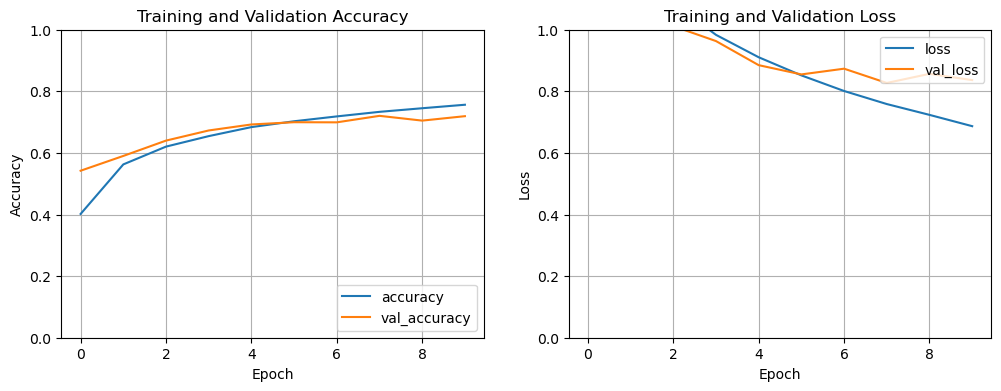

In [67]:
plt.figure(figsize=(12, 4))

# Plot for training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

# Plot for training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.show()